In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np
import pandas as pd

import watermark

plt.style.use('./CDS_paper.mplstyle')
tab10 = plt.get_cmap("tab10").colors

%matplotlib inline
%load_ext watermark
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.19.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.27)
OS          : Darwin
Release     : 20.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

Git hash: 

matplotlib: 3.3.3
numpy     : 1.19.4
watermark : 2.1.0
pandas    : 1.1.4



Load data

In [2]:
RP_og_cat = pd.read_csv("bootstrap/relative_prevalence_category.tsv", sep="\t", index_col=0)
RP_both_cat = pd.read_csv("bootstrap/relative_prevalence_no_urls_nor_http_category.tsv", sep="\t", index_col=0)

Order categories

In [3]:
sorted_cats = RP_og_cat.median().sort_values(ascending=False).index

Define plotting functions

In [4]:
def boxplot(ax, data, loc, color=(0, 0, 0)):    
    ax.fill_between([data.quantile(q=0.25), data.quantile(q=0.75)], loc - 0.15, loc + 0.15,
                    facecolor=(*color, 0.4), edgecolor=color, lw=3, zorder=3)
    ax.vlines(data.mean(), loc - 0.25, loc + 0.25, color=color, zorder=3)
    ax.plot([data.quantile(q=0.025), data.quantile(q=0.975)], [loc, loc],
            color=color, lw=0, marker="|", ms=12, mew=3, zorder=3)
    ax.plot([data.quantile(q=0.025), data.quantile(q=0.25)], [loc, loc], color=color, marker="", zorder=3)
    ax.plot([data.quantile(q=0.75), data.quantile(q=0.975)], [loc, loc], color=color, marker="", zorder=3)
    
    lower = data.values[data < data.quantile(q=0.025)]
    upper = data.values[data > data.quantile(q=0.975)]

    ax.scatter(lower, loc * np.ones(lower.shape), marker=".", color=color, zorder=3)
    ax.scatter(upper, loc * np.ones(upper.shape), marker=".", color=color, zorder=3)
    
    return ax

# Figure

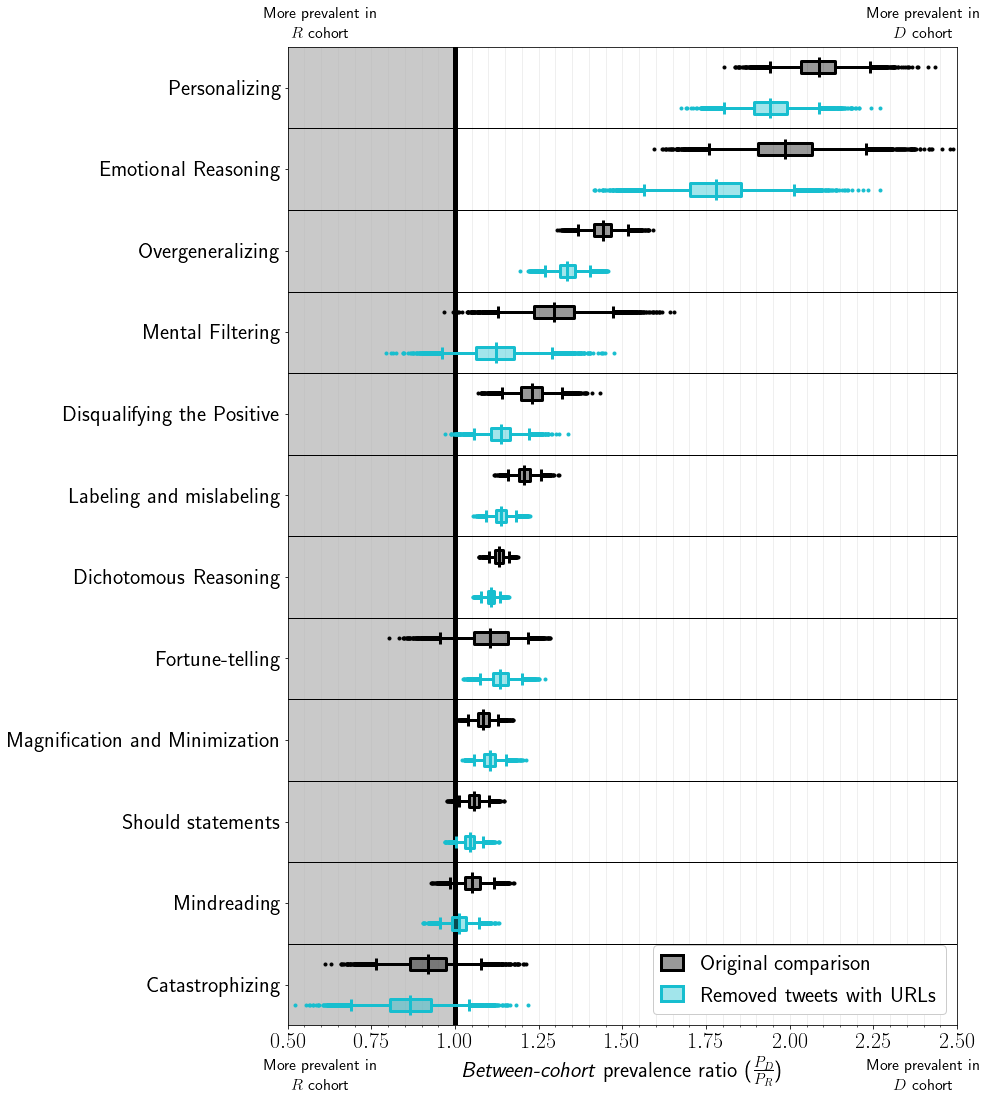

In [5]:
fig = plt.figure(figsize=(12, 18))
ax = fig.add_subplot(111)

for num, cat in enumerate(sorted_cats):
    ax = boxplot(ax, RP_og_cat.loc[:, cat], 2 * num + 1, color=(0, 0, 0))
    ax = boxplot(ax, RP_both_cat.loc[:, cat], 2 * num + 2, color=tab10[9])

ax.fill_between([0.5, 1], sorted_cats.size * 2 + 1, color='0.7', alpha=0.7, zorder=2)
ax.vlines(1, 0, sorted_cats.size * 2 + 1, color='k', lw=5, zorder=2)
ax.hlines(np.arange(2.5, sorted_cats.size * 2 + 1, 2), 0, 3, color="k", lw=1, zorder=2)

ax.set_xlim(left=0.5, right=2.5)
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.25))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.05))
ax.set_xlabel(r"\textit{Between-cohort} prevalence ratio ($\frac{P_D}{P_R}$)")
ax.set_ylim(bottom=0.5, top=24.5)
ax.set_yticks(np.arange(1.5, 24, 2))
ax.set_yticklabels([""] + sorted_cats.values)
ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.grid(axis="y", which="major", b=False)

p4 = mpatches.Patch(facecolor=(0, 0, 0, 0.4), edgecolor="k", lw=3)
p5 = mpatches.Patch(facecolor=(*tab10[9], 0.4), edgecolor="C9", lw=3)

labels = [r"Original comparison", r"Removed tweets with URLs"]
ax.legend([p4, p5], labels, loc="lower right", ncol=1, framealpha=1, scatterpoints=1)

ax.annotate(r"\begin{center}\noindent More prevalent in\\$R$ cohort\end{center}", (0.05, -0.05),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate(r"\begin{center}\noindent More prevalent in\\$D$ cohort\end{center}", (0.95, -0.05),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate(r"\begin{center}\noindent More prevalent in\\$R$ cohort\end{center}", (0.05, 1.025),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")
ax.annotate(r"\begin{center}\noindent More prevalent in\\$D$ cohort\end{center}", (0.95, 1.025),
            xycoords="axes fraction", fontsize=16, va="center", ha="center")

fig.savefig("figures/FigS4.pdf", dpi=600, orientation='portrait',
            facecolor='w', edgecolor='w', bbox_inches='tight')